In [ ]:
#Mohammad Sepehr
#Primary source of this project is the coinmarketcap website.
#https://coinmarketcap.com/api/

#The focus of this project is to implement an API pull automation using python.
#The data cleaning and visualizations are at a minimal level in this project, 
#However the potential of this data for cleaning and various visualizations is extremely high.


from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
    #we change the limit from 5000(provided by the website) to 25, for efficiency. 
  'limit':'25',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '48091e1d-03f7-4db1-8f12-79b30d16e6e3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [109]:
import pandas as pd
#The following allows us to see all the columns and rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
#Normalizing the data and putting it all in a table format.
df = pd.json_normalize(data['data'])
#Creating a time stamp so we know the exact time for every pull.
df['timestamp'] = pd.Timestamp.now()
df

In [124]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
    #we change the limit from 5000(provided by the website) to 25, for efficiency. 
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '48091e1d-03f7-4db1-8f12-79b30d16e6e3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    #Creating a time stamp so we know the exact time for every pull.
    df2['timestamp'] = pd.Timestamp.now()
    df = df.append(df2)
    
    
    #Use this if you want to create a csv file and append every pull to it.
#     df = pd.json_normalize(data['data'])
#     #Creating a time stamp so we know the exact time for every pull.
#     df['Timestamp'] = pd.to_datetime('now', utc=True)
#     df
    
#     #After each run, we append it to a csv file so we can have the information on our system.
#     if not os.path.isfile(r'/Users/mohammadsepehr/Desktop/cv/portfolio/API/API.csv'):
#         df.to_csv(r'/Users/mohammadsepehr/Desktop/cv/portfolio/API/API.csv', header = 'column_names')
#     else:
#         df.to_csv(r'/Users/mohammadsepehr/Desktop/cv/portfolio/API/API.csv', mode='a', header = False)
            

In [ ]:
import os
from time import time
from time import sleep

#pulls data once every minute.
for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute.
exit()

In [76]:
# if the runs are saved to a csv, we can take a look at them like below.
# dfcsv = pd.read_csv(r'/Users/mohammadsepehr/Desktop/cv/portfolio/API/API.csv')
# dfcsv

In [126]:
#if the runs are kept online and appended to the dataframe, we look at them as below.
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10164,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19348968.00000,19348968.00000,False,NaN,1,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,29522.28769,18672820852.65227,63.02850,0.10754,-2.76041,1.25373,7.94184,18.65159,38.85436,571225799750.36975,45.53020,619968041435.47998,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-17 14:33:07.931108
1,1027,Ethereum,ETH,ethereum,6734,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119434715.07548,119434715.07548,False,NaN,2,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,2083.93824,10965496427.97408,64.53680,0.09809,-0.98199,9.97377,16.33649,21.58776,31.87654,248894569694.83179,19.83510,248894569694.82999,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-17 14:33:07.931108
2,825,Tether,USDT,tether,51371,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,1.00033,34228140577.97779,56.47190,-0.00216,-0.01920,-0.03887,-0.25327,0.01081,0.02050,80958465603.74080,6.45510,84119429896.31000,NaN,2023-04-17T18:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-17 14:33:07.931108
3,1839,BNB,BNB,bnb,1264,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865521.50690,155865521.50690,False,NaN,4,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,341.07376,904314696.14490,2.19510,0.26409,-2.14800,8.53799,1.23886,6.33302,12.93584,53161639958.91805,4.23660,53161639958.92000,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-17 14:33:07.931108
4,3408,USD Coin,USDC,usd-coin,11837,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31589434988.90181,31589434988.90181,False,NaN,5,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,0.99978,5022304668.58518,47.47760,0.00155,0.00643,-0.01334,-0.01765,-0.01605,-0.02492,31582428606.33592,2.51690,31582428606.34000,NaN,2023-04-17T18:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-17 14:33:07.931108
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,0.51171,1017040601.01548,71.39560,0.50164,-1.99745,0.02598,34.62752,27.96876,31.25267,26481542401.61962,2.11120,51171261296.57000,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-17 14:33:07.931108
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34777446695.61000,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,0.43812,488153806.33835,24.94050,0.26107,-2.74420,11.71190,27.37423,7.26904,24.44455,15236591847.66641,1.21490,19715266596.37000,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-17 14:33:07.931108
7,74,Dogecoin,DOGE,dogecoin,686,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138978996383.70526,138978996383.70526,False,NaN,8,NaN,NaN,NaN,2023-04-17T18:31:00.000Z,0.09142,1394706662.61732,176.36060,0.64266,1.52570,8.69336,21.78403,2.02487,9.17757,12706087299.64717,1.01310,12706087299.65000,NaN,2023-04-17T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# The Automation process is over, now we will transform and clean the data 
# to make it more usable and easier to understand and to work with.

In [127]:
# Changing the numbers from the scientific format to regular floats. 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [129]:
#Grouping the mentioned columns by name. This dataframe really puts the changes into perspective.
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09547,-2.75621,1.21287,7.90965,18.66289,38.84120
Ethereum,0.09910,-0.96708,9.97261,16.34305,21.61500,31.88966
Tether,0.00688,-0.01732,-0.01561,-0.24988,0.01252,0.02141
BNB,0.25954,-2.14706,8.53806,1.23444,6.34531,12.93926
USD Coin,0.00155,0.00414,-0.00329,-0.01293,-0.01647,-0.02875
XRP,0.50289,-1.99625,0.01929,34.63538,27.97184,31.24990
Cardano,0.26106,-2.74026,11.71840,27.37557,7.28047,24.44067
Dogecoin,0.64236,1.54311,8.69138,21.81145,2.03153,9.17579
Polygon,0.16480,-0.69049,4.41107,-3.22277,-20.23800,14.83626


In [130]:
#The following is the same df as above, but it's easier to work with for some in my opinion.
#However it's worth mentioning that using .stack() changes the type from dataframe to series.
df3 = df2.stack()
df3

name                                          
Bitcoin           quote.USD.percent_change_1h      0.09547
                  quote.USD.percent_change_24h    -2.75621
                  quote.USD.percent_change_7d      1.21287
                  quote.USD.percent_change_30d     7.90965
                  quote.USD.percent_change_60d    18.66289
                  quote.USD.percent_change_90d    38.84120
Ethereum          quote.USD.percent_change_1h      0.09910
                  quote.USD.percent_change_24h    -0.96708
                  quote.USD.percent_change_7d      9.97261
                  quote.USD.percent_change_30d    16.34305
                  quote.USD.percent_change_60d    21.61500
                  quote.USD.percent_change_90d    31.88966
Tether            quote.USD.percent_change_1h      0.00688
                  quote.USD.percent_change_24h    -0.01732
                  quote.USD.percent_change_7d     -0.01561
                  quote.USD.percent_change_30d    -0.24988
         

In [131]:
#Converting df3 which was a series because of .stack() back to a dataframe.
df4 = df3.to_frame(name='values')
df4

values
name                                                   
Bitcoin          quote.USD.percent_change_1h    0.09547
                 quote.USD.percent_change_24h  -2.75621
                 quote.USD.percent_change_7d    1.21287
                 quote.USD.percent_change_30d   7.90965
                 quote.USD.percent_change_60d  18.66289
                 quote.USD.percent_change_90d  38.84120
Ethereum         quote.USD.percent_change_1h    0.09910
                 quote.USD.percent_change_24h  -0.96708
                 quote.USD.percent_change_7d    9.97261
                 quote.USD.percent_change_30d  16.34305
                 quote.USD.percent_change_60d  21.61500
                 quote.USD.percent_change_90d  31.88966
Tether           quote.USD.percent_change_1h    0.00688
                 quote.USD.percent_change_24h  -0.01732
                 quote.USD.percent_change_7d   -0.01561
                 quote.USD.percent_change_30d  -0.24988
                 quote.USD.percent_change_60d   0.01252
                 quote.USD.percent_change_90d   0.02141
BNB              quote.USD.percent_change_1h    0.25954
                 quote.USD.percent_change_24h  -2.14706
                 quote.USD.percent_change_7d    8.53806
                 quote.USD.percent_change_30d   1.23444
                 quote.USD.percent_change_60d   6.34531
                 quote.USD.percent_change_90d  12.93926
USD Coin         quote.USD.percent_change_1h    0.00155
                 quote.USD.percent_change_24h   0.00414
                 quote.USD.percent_change_7d   -0.00329
                 quote.USD.percent_change_30d  -0.01293
                 quote.USD.percent_change_60d  -0.01647
                 quote.USD.percent_change_90d  -0.02875
XRP              quote.USD.percent_change_1h    0.50289
                 quote.USD.percent_change_24h  -1.99625
                 quote.USD.percent_change_7d    0.01929
                 quote.USD.percent_change_30d  34.63538
                 quote.USD.percent_change_60d  27.97184
                 quote.USD.percent_change_90d  31.24990
Cardano          quote.USD.percent_change_1h    0.26106
                 quote.USD.percent_change_24h  -2.74026
                 quote.USD.percent_change_7d   11.71840
                 quote.USD.percent_change_30d  27.37557
                 quote.USD.percent_change_60d   7.28047
                 quote.USD.percent_change_90d  24.44067
Dogecoin         quote.USD.percent_change_1h    0.64236
                 quote.USD.percent_change_24h   1.54311
                 quote.USD.percent_change_7d    8.69138
                 quote.USD.percent_change_30d  21.81145
                 quote.USD.percent_change_60d   2.03153
                 quote.USD.percent_change_90d   9.17579
Polygon          quote.USD.percent_change_1h    0.16480
                 quote.USD.percent_change_24h  -0.69049
                 quote.USD.percent_change_7d    4.41107
                 quote.USD.percent_change_30d  -3.22277
                 quote.USD.percent_change_60d -20.23800
                 quote.USD.percent_change_90d  14.83626
Solana           quote.USD.percent_change_1h    0.39232
                 quote.USD.percent_change_24h   1.59497
                 quote.USD.percent_change_7d   20.40407
                 quote.USD.percent_change_30d  12.47412
                 quote.USD.percent_change_60d   4.54165
                 quote.USD.percent_change_90d   5.97979
Polkadot         quote.USD.percent_change_1h    0.20012
                 quote.USD.percent_change_24h  -1.10067
                 quote.USD.percent_change_7d    7.76063
                 quote.USD.percent_change_30d   3.55858
                 quote.USD.percent_change_60d   0.99502
                 quote.USD.percent_change_90d  11.01416
Litecoin         quote.USD.percent_change_1h    0.18780
                 quote.USD.percent_change_24h  -2.58752
                 quote.USD.percent_change_7d    6.53243
                 quote.USD.percent_change_30d  16.61787
                 

In [132]:
#Now we can see that the index are the name of the cryptocurrencies, 
#but we can't work freely with those.
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09547
1,Bitcoin,quote.USD.percent_change_24h,-2.75621
2,Bitcoin,quote.USD.percent_change_7d,1.21287
3,Bitcoin,quote.USD.percent_change_30d,7.90965
4,Bitcoin,quote.USD.percent_change_60d,18.66289
5,Bitcoin,quote.USD.percent_change_90d,38.84120
6,Ethereum,quote.USD.percent_change_1h,0.09910
7,Ethereum,quote.USD.percent_change_24h,-0.96708
8,Ethereum,quote.USD.percent_change_7d,9.97261
9,Ethereum,quote.USD.percent_change_30d,16.34305


In [ ]:
df6= df5.rename(columns={'level_1':'percent_change'})
df6

In [134]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.09547
1,Bitcoin,24h,-2.75621
2,Bitcoin,7d,1.21287
3,Bitcoin,30d,7.90965
4,Bitcoin,60d,18.66289
5,Bitcoin,90d,38.84120
6,Ethereum,1h,0.09910
7,Ethereum,24h,-0.96708
8,Ethereum,7d,9.97261
9,Ethereum,30d,16.34305


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

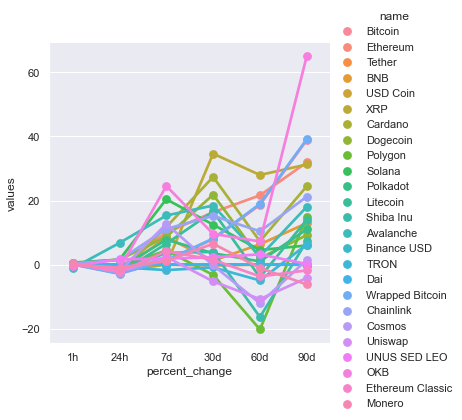

In [160]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [164]:
df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7 = df7.reset_index(drop=True)
df7['timestamp'] = pd.to_datetime(df7['timestamp'])
# convert the timestamp to a string with the desired format
df7['timestamp'] = df7['timestamp'].dt.strftime('%Y-%m-%d %H:%M')
df7

,name,quote.USD.price,timestamp
0,Bitcoin,29522.28769,2023-04-17 14:33
1,Bitcoin,29527.70463,2023-04-17 14:33
2,Bitcoin,29527.70463,2023-04-17 14:34
3,Bitcoin,29516.97969,2023-04-17 14:35


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

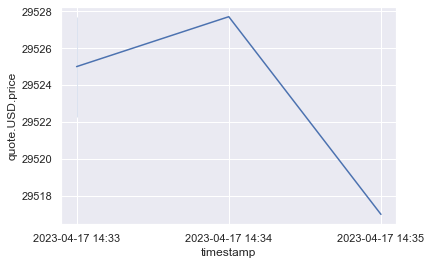

In [165]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df7)

In [ ]:
# This project can be taken much further, as it has so much potential for data cleaning. 
# Many different visualizations can be made with the cleaned data.
# This was just a short demonstration of work with api, and libraries such as seaborn and pandas. 